In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler


In [3]:
data = pd.read_csv('Covid-19_US.csv', usecols=[1,5,6])
data['dateRep'] = pd.to_datetime(data['dateRep'])
data.head()

,dateRep,cases,total
0,2019-12-31,0,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,0,0
4,2020-01-04,0,0


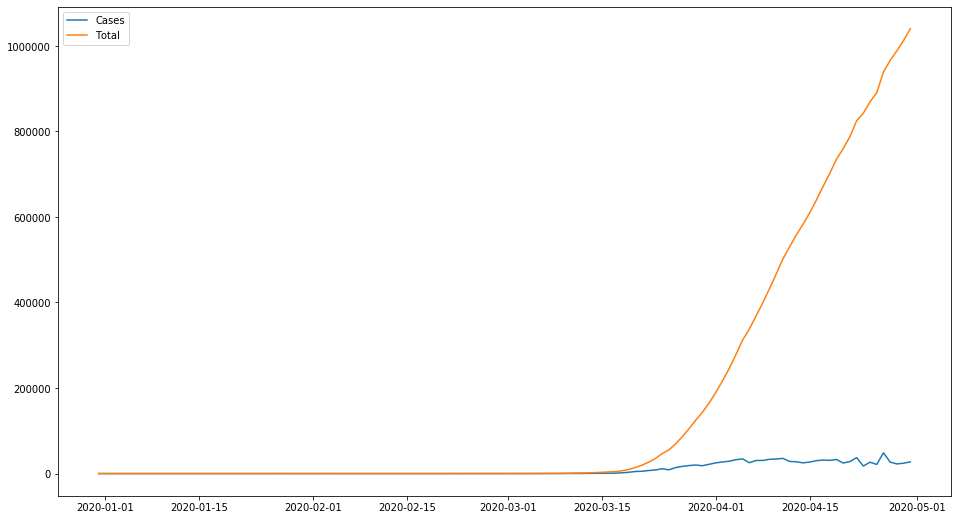

In [5]:
plt.figure(figsize=(16,9))
x = data['dateRep']
y = data['cases']
z = data['total']
plt.plot(x,y)
plt.plot(x,z)
plt.legend(['Cases', 'Total'])
plt.show()

In [6]:
def create_dataset(dataset, look_back=9):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back),0]
		dataX.append(a)
		dataY.append(dataset[i + look_back,0])
	return np.array(dataX), np.array(dataY)


In [7]:
from sklearn.preprocessing import MinMaxScaler
dataset = data['cases'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(122, 1)

In [8]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [9]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX)

[[0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [2.0606236e-05]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [2.0606236e-05]
 [0.0000000e+00]
 [6.1818704e-05]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [2.0606236e-05]
 [2.0606236e-05]
 [2.0606236e-05]
 [6.1818704e-05]
 [0.0000000e+00]
 [0.0000000e+00]
 [2.0606236e-05]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [2.0606236e-05]
 [0.0000000e+00]
 [2.0606236e-05]
 [2.0606236e-05]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [2.0606236e-05]
 [3.9151849e-04]
 [0.0000000e+00]
 [0.0000000e+00]
 [3.7091225e-04]
 [0.0000000e+00]
 [1.2363741e-0

In [10]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
model = Sequential()
model.add(LSTM(256, input_shape=(1, look_back), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=2, verbose=2)

Epoch 1/20
42/42 - 0s - loss: 8.3736e-04
Epoch 2/20
42/42 - 0s - loss: 7.8142e-04
Epoch 3/20
42/42 - 0s - loss: 7.7353e-04
Epoch 4/20
42/42 - 0s - loss: 7.2094e-04
Epoch 5/20
42/42 - 0s - loss: 6.6553e-04
Epoch 6/20
42/42 - 0s - loss: 6.1609e-04
Epoch 7/20
42/42 - 0s - loss: 5.5052e-04
Epoch 8/20
42/42 - 0s - loss: 4.6877e-04
Epoch 9/20
42/42 - 0s - loss: 3.7991e-04
Epoch 10/20
42/42 - 0s - loss: 3.5617e-04
Epoch 11/20
42/42 - 0s - loss: 2.2796e-04
Epoch 12/20
42/42 - 0s - loss: 1.6373e-04
Epoch 13/20
42/42 - 0s - loss: 1.5018e-04
Epoch 14/20
42/42 - 0s - loss: 1.0275e-04
Epoch 15/20
42/42 - 0s - loss: 4.9980e-05
Epoch 16/20
42/42 - 0s - loss: 3.2009e-05
Epoch 17/20
42/42 - 0s - loss: 2.7105e-05
Epoch 18/20
42/42 - 0s - loss: 2.3338e-05
Epoch 19/20
42/42 - 0s - loss: 2.6175e-05
Epoch 20/20
42/42 - 0s - loss: 2.8955e-05


In [12]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = trainPredict.reshape(-1,1)
testPredict = testPredict.reshape(-1,1)
#trainPredict = scaler.inverse_transform(trainPredict)
#testPredict = scaler.inverse_transform(testPredict)
#dataset = scaler.inverse_transform(dataset)

In [13]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
dataset = scaler.inverse_transform(dataset)

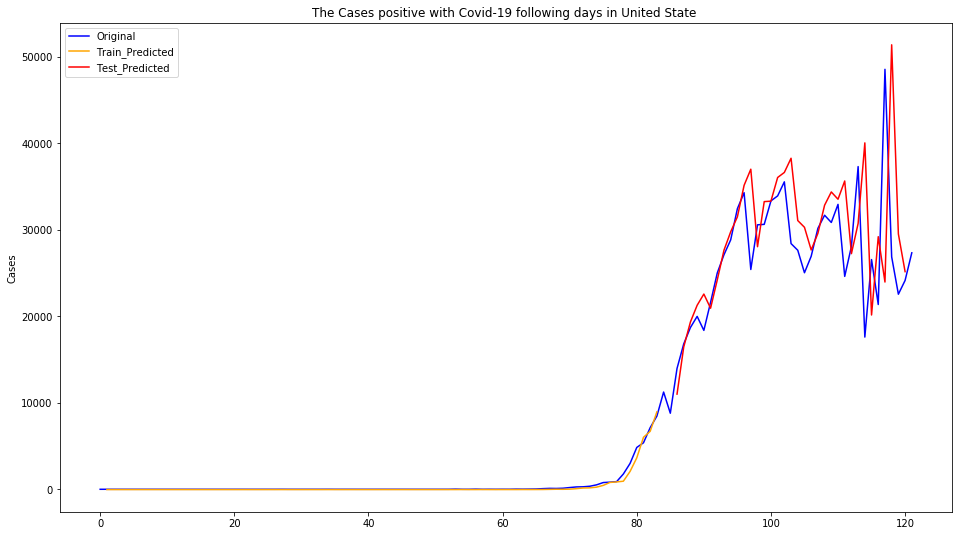

In [28]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(16,9))
plt.plot(dataset, color = 'blue')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'red')
plt.legend(['Original','Train_Predicted','Test_Predicted'])
plt.title('The Cases positive with Covid-19 following days in United State ')
plt.ylabel('Cases')
plt.show()

In [15]:
testY =scaler.inverse_transform(testY.reshape(-1,1))

In [16]:
testY

array([[13963.001],
       [16797.   ],
       [18695.   ],
       [19979.   ],
       [18360.   ],
       [21595.   ],
       [24997.998],
       [27103.   ],
       [28818.998],
       [32425.002],
       [34272.   ],
       [25397.998],
       [30560.998],
       [30613.002],
       [33323.   ],
       [33901.   ],
       [35527.   ],
       [28391.   ],
       [27620.   ],
       [25023.   ],
       [26922.002],
       [30148.   ],
       [31666.998],
       [30833.   ],
       [32922.   ],
       [24600.998],
       [28065.   ],
       [37289.   ],
       [17588.   ],
       [26542.998],
       [21352.   ],
       [48529.   ],
       [26857.   ],
       [22541.   ],
       [24132.   ]], dtype=float32)

In [17]:
testPredict

array([[10649.731],
       [17228.174],
       [20886.574],
       [23366.594],
       [25058.025],
       [22927.098],
       [27201.836],
       [31774.438],
       [34642.504],
       [37003.   ],
       [42028.918],
       [44637.773],
       [32317.11 ],
       [39419.86 ],
       [39492.324],
       [43294.39 ],
       [44111.855],
       [46423.867],
       [36412.363],
       [35351.56 ],
       [31808.326],
       [34394.703],
       [38845.02 ],
       [40965.05 ],
       [39799.094],
       [42728.605],
       [31236.926],
       [35963.324],
       [48949.883],
       [21917.174],
       [33876.543],
       [26878.332],
       [65570.22 ],
       [34305.76 ],
       [28465.055]], dtype=float32)

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(testY, testPredict)
MSE = mean_squared_error(testY, testPredict)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

8983.168
149887890.0
12242.871


In [19]:
from sklearn.preprocessing import MinMaxScaler
dataset = data['cases'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(122, 1)

In [20]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [21]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [22]:
ANN_model = Sequential()
ANN_model.add(Dense(512, input_shape=(1, look_back), activation='relu'))
ANN_model.add(Dense(1))
ANN_model.compile(loss='mean_squared_error', optimizer='adam')
ANN_model.fit(trainX, trainY, epochs=20, batch_size=2, verbose=2)

Epoch 1/20
42/42 - 0s - loss: 9.7827e-04
Epoch 2/20
42/42 - 0s - loss: 4.7390e-04
Epoch 3/20
42/42 - 0s - loss: 3.8667e-04
Epoch 4/20
42/42 - 0s - loss: 3.0657e-04
Epoch 5/20
42/42 - 0s - loss: 1.4739e-04
Epoch 6/20
42/42 - 0s - loss: 8.2912e-05
Epoch 7/20
42/42 - 0s - loss: 4.3022e-05
Epoch 8/20
42/42 - 0s - loss: 2.5827e-05
Epoch 9/20
42/42 - 0s - loss: 2.0531e-05
Epoch 10/20
42/42 - 0s - loss: 2.3712e-05
Epoch 11/20
42/42 - 0s - loss: 4.3617e-05
Epoch 12/20
42/42 - 0s - loss: 2.0886e-05
Epoch 13/20
42/42 - 0s - loss: 5.2425e-05
Epoch 14/20
42/42 - 0s - loss: 3.4770e-05
Epoch 15/20
42/42 - 0s - loss: 2.6532e-05
Epoch 16/20
42/42 - 0s - loss: 3.2289e-05
Epoch 17/20
42/42 - 0s - loss: 2.3882e-05
Epoch 18/20
42/42 - 0s - loss: 2.4960e-05
Epoch 19/20
42/42 - 0s - loss: 3.1122e-05
Epoch 20/20
42/42 - 0s - loss: 2.9578e-05


In [23]:
trainPredict = ANN_model.predict(trainX)
testPredict = ANN_model.predict(testX)
trainPredict = trainPredict.reshape(-1,1)
testPredict = testPredict.reshape(-1,1)

In [24]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
dataset = scaler.inverse_transform(dataset)

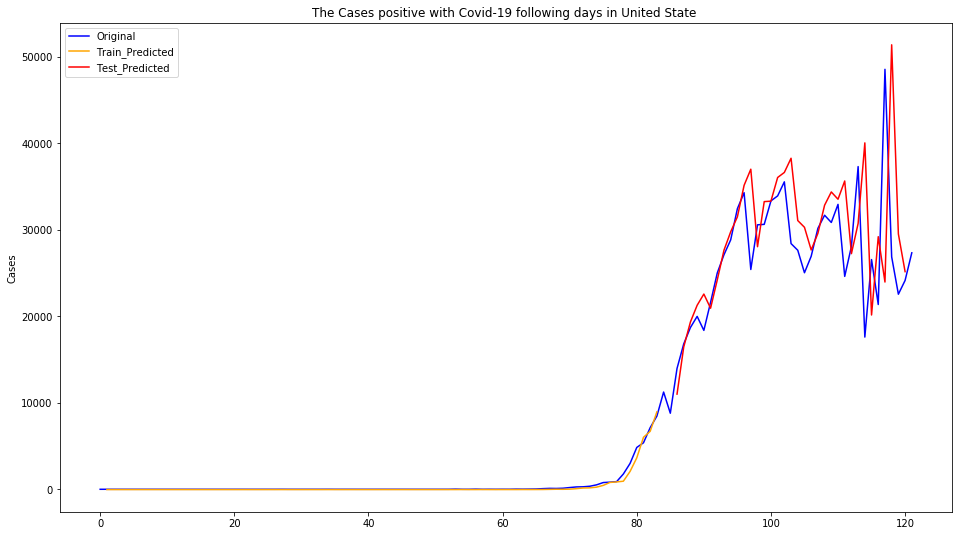

In [29]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(16,9))
plt.plot(dataset, color = 'blue')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'red')
plt.legend(['Original','Train_Predicted','Test_Predicted'])
plt.title('The Cases positive with Covid-19 following days in United State ')
plt.ylabel('Cases')
plt.show()

In [26]:
testY =scaler.inverse_transform(testY.reshape(-1,1))

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(testY, testPredict)
MSE = mean_squared_error(testY, testPredict)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

4898.891
67510536.0
8216.4795
